In [202]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import matplotlib

In [203]:
# Cohort 1. Cohort_1_298-sample_FNIH_Symptomatic_AD_and_Controls
# DMD - Duchenne muscular dystrophy

In [204]:
johnson_csf = pd.read_csv('/Users/macbook/Desktop/data/johnson_20/CSF/Cohort_1_298-sample_FNIH_Symptomatic_AD_and_Controls/data/0.Traits.csv')
johnson_csf

,SampleID,Batch,GUID,Group,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,Race,APOE.Genotype,APOE.Risk
0,b1.127N,1,GIS,GIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b1.128N,1,50975,Control,69.0,1.0,21.0,564.67,71.03,28.80,0.0,Caucasian or White,NaN,NaN
2,b1.128C,1,43913,AD,75.0,1.0,0.0,155.18,123.35,57.31,1.0,Caucasian or White,e4-4,2.0
3,b1.129N,1,56326,Control,71.0,0.0,25.0,636.39,87.01,57.09,0.0,Caucasian or White,NaN,NaN
4,b1.129C,1,52488,Control,59.0,0.0,27.0,419.31,32.56,30.95,0.0,Caucasian or White,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,b38.129C,38,51041,Control,73.0,0.0,26.0,391.36,44.98,16.69,0.0,Caucasian or White,NaN,NaN
338,b38.130N,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,b38.130C,38,50419,Control,79.0,1.0,25.0,650.64,79.92,19.48,1.0,Caucasian or White,e2-3,-1.0
340,b38.131N,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
johnson_csf.isna().sum()

SampleID           0
Batch              0
GUID               3
Group              4
Age               45
Sex               45
MoCA              46
AB42.ELISA        46
tTau.ELISA        46
pTau.ELISA        46
DMDfound          46
Race              45
APOE.Genotype    162
APOE.Risk        162
dtype: int64

In [206]:
johnson_csf.isna().sum() / len(johnson_csf)

SampleID         0.000000
Batch            0.000000
GUID             0.008772
Group            0.011696
Age              0.131579
Sex              0.131579
MoCA             0.134503
AB42.ELISA       0.134503
tTau.ELISA       0.134503
pTau.ELISA       0.134503
DMDfound         0.134503
Race             0.131579
APOE.Genotype    0.473684
APOE.Risk        0.473684
dtype: float64

In [207]:
johnson_csf['APOE.Genotype'] = johnson_csf['APOE.Genotype'].str.split('-').str[0] + johnson_csf['APOE.Genotype'].str.split('-').str[1]
johnson_csf.head(170)

,SampleID,Batch,GUID,Group,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,Race,APOE.Genotype,APOE.Risk
0,b1.127N,1,GIS,GIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b1.128N,1,50975,Control,69.0,1.0,21.0,564.67,71.03,28.80,0.0,Caucasian or White,NaN,NaN
2,b1.128C,1,43913,AD,75.0,1.0,0.0,155.18,123.35,57.31,1.0,Caucasian or White,e44,2.0
3,b1.129N,1,56326,Control,71.0,0.0,25.0,636.39,87.01,57.09,0.0,Caucasian or White,NaN,NaN
4,b1.129C,1,52488,Control,59.0,0.0,27.0,419.31,32.56,30.95,0.0,Caucasian or White,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,b19.129N,19,47814,AD,77.0,1.0,19.0,186.88,64.28,58.14,1.0,Caucasian or White,e33,0.0
166,b19.129C,19,47402,Control,71.0,0.0,27.0,549.98,67.87,20.78,0.0,Caucasian or White,NaN,NaN
167,b19.130N,19,47476,Control,65.0,1.0,25.0,178.61,55.34,35.37,1.0,Black or African American,e34,1.0
168,b19.130C,19,49917,Control,55.0,0.0,30.0,828.35,60.32,48.80,0.0,Caucasian or White,NaN,NaN


In [208]:
csf1_c = pd.read_csv('/Users/macbook/Desktop/data/johnson_20/CSF/Cohort_1_298-sample_FNIH_Symptomatic_AD_and_Controls/data/3.cleanDat.csv')
csf1_c.head(5)

,Unnamed: 0,b1.128N,b1.128C,b1.129N,b1.129C,b1.130N,b1.130C,b1.131N,b1.131C,b2.128N,...,b37.129N,b37.129C,b37.130N,b37.130C,b37.131N,b37.131C,b38.128C,b38.129C,b38.130C,b38.131C
0,UBA52|M0R1V7,0.385737,0.447032,0.413142,0.173151,0.779843,0.890533,0.469991,0.512001,0.195301,...,0.356308,-0.123085,-0.451055,0.433923,-2.150726,0.630277,0.091535,0.165162,0.476004,0.799652
1,MT3|P25713,0.249936,-0.316240,-0.049811,-0.760143,-0.260960,-0.035626,-0.153586,-0.138081,0.248069,...,-0.623863,-0.346447,-0.892340,0.056244,NaN,-0.717299,-0.418412,-0.719094,0.259810,0.174820
2,NFASC|O94856,0.228274,0.335041,0.505317,0.408155,0.132031,0.423145,0.479247,0.574760,0.203479,...,0.209216,0.331329,0.045964,0.326593,-0.716019,-0.257437,0.132034,-0.094747,0.024928,0.198803
3,ALDOA|P04075,0.268604,0.792665,0.180235,0.026380,0.483377,0.659666,0.199907,0.621720,0.155829,...,0.332011,-0.059397,0.353491,0.018018,1.648215,0.381700,0.263355,0.104156,0.290615,0.332098
4,LSAMP|Q13449,0.011667,0.016855,0.364482,0.143697,0.348454,0.608024,0.306537,0.191341,0.133495,...,0.161707,0.038688,-0.515746,0.182892,-1.174905,-0.109594,-0.026480,-0.104794,0.337015,0.491405


In [209]:
csf1_c = csf1_c.T

In [210]:
csf1_c

,0,1,2,3,4,5,6,7,8,9,...,522,523,524,525,526,527,528,529,530,531
Unnamed: 0,UBA52|M0R1V7,MT3|P25713,NFASC|O94856,ALDOA|P04075,LSAMP|Q13449,PARK7|K7ELW0,YWHAZ|P63104,CXCL16|I3L333,CST7|O76096,SELENBP1|Q13228,...,SLITRK4|Q8IW52,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818
b1.128N,0.385737,0.249936,0.228274,0.268604,0.011667,-0.628161,0.150422,-0.132595,-0.055764,-0.210517,...,NaN,0.377899,NaN,-0.256826,-0.197321,0.297958,0.075416,NaN,-0.451014,0.195555
b1.128C,0.447032,-0.31624,0.335041,0.792665,0.016855,0.416299,0.699914,-0.579216,-0.055166,-0.620331,...,NaN,0.069074,NaN,-0.217291,-0.303112,0.137384,-2.75925,NaN,0.095578,0.093388
b1.129N,0.413142,-0.049811,0.505317,0.180235,0.364482,-0.214324,-0.190503,-0.79537,-0.386065,-0.123568,...,NaN,-1.527941,NaN,-0.069514,0.358581,0.60311,-0.057835,NaN,-0.321892,0.005065
b1.129C,0.173151,-0.760143,0.408155,0.02638,0.143697,-0.459431,-0.025429,-0.662693,0.135396,0.147547,...,NaN,-0.643409,NaN,-0.942823,-0.22826,0.289598,-0.982259,NaN,-0.378905,0.346308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b37.131C,0.630277,-0.717299,-0.257437,0.3817,-0.109594,0.012303,0.263669,0.196062,0.509869,-0.23855,...,0.344536,0.256473,-0.061426,-0.372001,0.425732,-0.190848,-0.329549,NaN,-0.054375,0.226923
b38.128C,0.091535,-0.418412,0.132034,0.263355,-0.02648,-0.298145,-0.120232,-0.783325,-0.094982,-0.357624,...,0.842937,NaN,-0.825622,-0.863409,-0.066724,0.171526,-0.087892,NaN,-0.238636,0.20062
b38.129C,0.165162,-0.719094,-0.094747,0.104156,-0.104794,-0.351362,-0.368737,-0.267334,0.125149,-0.024478,...,0.304443,NaN,-0.780664,-0.216836,-0.464697,-0.13825,-0.414623,NaN,-0.389031,0.524714
b38.130C,0.476004,0.25981,0.024928,0.290615,0.337015,-0.576282,-0.495676,-0.4246,-0.360741,-0.29113,...,0.697748,NaN,-0.868676,-0.812232,-0.180298,0.374221,-0.579431,NaN,0.016149,0.289376


In [211]:
first = csf1_c.iloc[0]
csf1_c.drop('Unnamed: 0', inplace=True)
first

0      UBA52|M0R1V7
1        MT3|P25713
2      NFASC|O94856
3      ALDOA|P04075
4      LSAMP|Q13449
           ...     
527    NEGR1|Q7Z3B1
528    PEBP4|Q96S96
529     GMFB|P60983
530    SCRG1|O75711
531    NUCB1|Q02818
Name: Unnamed: 0, Length: 532, dtype: object

In [212]:
csf1_c.columns = first
csf1_c.reset_index(inplace = True)
csf1_c

Unnamed: 0,index,UBA52|M0R1V7,MT3|P25713,NFASC|O94856,ALDOA|P04075,LSAMP|Q13449,PARK7|K7ELW0,YWHAZ|P63104,CXCL16|I3L333,CST7|O76096,...,SLITRK4|Q8IW52,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818
0,b1.128N,0.385737,0.249936,0.228274,0.268604,0.011667,-0.628161,0.150422,-0.132595,-0.055764,...,NaN,0.377899,NaN,-0.256826,-0.197321,0.297958,0.075416,NaN,-0.451014,0.195555
1,b1.128C,0.447032,-0.31624,0.335041,0.792665,0.016855,0.416299,0.699914,-0.579216,-0.055166,...,NaN,0.069074,NaN,-0.217291,-0.303112,0.137384,-2.75925,NaN,0.095578,0.093388
2,b1.129N,0.413142,-0.049811,0.505317,0.180235,0.364482,-0.214324,-0.190503,-0.79537,-0.386065,...,NaN,-1.527941,NaN,-0.069514,0.358581,0.60311,-0.057835,NaN,-0.321892,0.005065
3,b1.129C,0.173151,-0.760143,0.408155,0.02638,0.143697,-0.459431,-0.025429,-0.662693,0.135396,...,NaN,-0.643409,NaN,-0.942823,-0.22826,0.289598,-0.982259,NaN,-0.378905,0.346308
4,b1.130N,0.779843,-0.26096,0.132031,0.483377,0.348454,-0.404295,0.676482,-0.475009,-0.243164,...,NaN,-1.115897,NaN,-0.289641,-0.064313,0.407274,0.413057,NaN,0.170237,0.010673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,b37.131C,0.630277,-0.717299,-0.257437,0.3817,-0.109594,0.012303,0.263669,0.196062,0.509869,...,0.344536,0.256473,-0.061426,-0.372001,0.425732,-0.190848,-0.329549,NaN,-0.054375,0.226923
293,b38.128C,0.091535,-0.418412,0.132034,0.263355,-0.02648,-0.298145,-0.120232,-0.783325,-0.094982,...,0.842937,NaN,-0.825622,-0.863409,-0.066724,0.171526,-0.087892,NaN,-0.238636,0.20062
294,b38.129C,0.165162,-0.719094,-0.094747,0.104156,-0.104794,-0.351362,-0.368737,-0.267334,0.125149,...,0.304443,NaN,-0.780664,-0.216836,-0.464697,-0.13825,-0.414623,NaN,-0.389031,0.524714
295,b38.130C,0.476004,0.25981,0.024928,0.290615,0.337015,-0.576282,-0.495676,-0.4246,-0.360741,...,0.697748,NaN,-0.868676,-0.812232,-0.180298,0.374221,-0.579431,NaN,0.016149,0.289376


In [213]:
csf1_c.rename(columns={'index':'SampleID'}, inplace = True)
csf1_c

Unnamed: 0,SampleID,UBA52|M0R1V7,MT3|P25713,NFASC|O94856,ALDOA|P04075,LSAMP|Q13449,PARK7|K7ELW0,YWHAZ|P63104,CXCL16|I3L333,CST7|O76096,...,SLITRK4|Q8IW52,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818
0,b1.128N,0.385737,0.249936,0.228274,0.268604,0.011667,-0.628161,0.150422,-0.132595,-0.055764,...,NaN,0.377899,NaN,-0.256826,-0.197321,0.297958,0.075416,NaN,-0.451014,0.195555
1,b1.128C,0.447032,-0.31624,0.335041,0.792665,0.016855,0.416299,0.699914,-0.579216,-0.055166,...,NaN,0.069074,NaN,-0.217291,-0.303112,0.137384,-2.75925,NaN,0.095578,0.093388
2,b1.129N,0.413142,-0.049811,0.505317,0.180235,0.364482,-0.214324,-0.190503,-0.79537,-0.386065,...,NaN,-1.527941,NaN,-0.069514,0.358581,0.60311,-0.057835,NaN,-0.321892,0.005065
3,b1.129C,0.173151,-0.760143,0.408155,0.02638,0.143697,-0.459431,-0.025429,-0.662693,0.135396,...,NaN,-0.643409,NaN,-0.942823,-0.22826,0.289598,-0.982259,NaN,-0.378905,0.346308
4,b1.130N,0.779843,-0.26096,0.132031,0.483377,0.348454,-0.404295,0.676482,-0.475009,-0.243164,...,NaN,-1.115897,NaN,-0.289641,-0.064313,0.407274,0.413057,NaN,0.170237,0.010673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,b37.131C,0.630277,-0.717299,-0.257437,0.3817,-0.109594,0.012303,0.263669,0.196062,0.509869,...,0.344536,0.256473,-0.061426,-0.372001,0.425732,-0.190848,-0.329549,NaN,-0.054375,0.226923
293,b38.128C,0.091535,-0.418412,0.132034,0.263355,-0.02648,-0.298145,-0.120232,-0.783325,-0.094982,...,0.842937,NaN,-0.825622,-0.863409,-0.066724,0.171526,-0.087892,NaN,-0.238636,0.20062
294,b38.129C,0.165162,-0.719094,-0.094747,0.104156,-0.104794,-0.351362,-0.368737,-0.267334,0.125149,...,0.304443,NaN,-0.780664,-0.216836,-0.464697,-0.13825,-0.414623,NaN,-0.389031,0.524714
295,b38.130C,0.476004,0.25981,0.024928,0.290615,0.337015,-0.576282,-0.495676,-0.4246,-0.360741,...,0.697748,NaN,-0.868676,-0.812232,-0.180298,0.374221,-0.579431,NaN,0.016149,0.289376


In [214]:
df = pd.merge(johnson_csf, csf1_c, on = 'SampleID', how = 'right')
df['y'] = df['Group'] == 'AD'
df.drop(columns = ['GUID', 'Race', 'SampleID', 'Group'], inplace = True)
df.head(10)

,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Genotype,APOE.Risk,...,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818,y
0,1,69.0,1.0,21.0,564.67,71.03,28.80,0.0,NaN,NaN,...,0.377899,NaN,-0.256826,-0.197321,0.297958,0.075416,NaN,-0.451014,0.195555,False
1,1,75.0,1.0,0.0,155.18,123.35,57.31,1.0,e44,2.0,...,0.069074,NaN,-0.217291,-0.303112,0.137384,-2.75925,NaN,0.095578,0.093388,True
2,1,71.0,0.0,25.0,636.39,87.01,57.09,0.0,NaN,NaN,...,-1.527941,NaN,-0.069514,0.358581,0.60311,-0.057835,NaN,-0.321892,0.005065,False
3,1,59.0,0.0,27.0,419.31,32.56,30.95,0.0,NaN,NaN,...,-0.643409,NaN,-0.942823,-0.22826,0.289598,-0.982259,NaN,-0.378905,0.346308,False
4,1,58.0,1.0,15.0,408.93,109.66,38.27,1.0,e33,0.0,...,-1.115897,NaN,-0.289641,-0.064313,0.407274,0.413057,NaN,0.170237,0.010673,True
5,1,61.0,0.0,26.0,430.96,91.75,34.69,1.0,e34,1.0,...,-0.158949,NaN,0.842897,0.150929,0.671961,-0.379685,NaN,-0.016157,-0.232782,False
6,1,57.0,0.0,29.0,1010.59,74.47,62.04,0.0,NaN,NaN,...,0.105328,NaN,-0.698789,0.158054,0.430001,-0.28189,NaN,-0.079344,0.168004,False
7,1,52.0,0.0,21.0,390.50,129.84,112.08,1.0,e44,2.0,...,NaN,NaN,0.268913,-0.178208,0.512569,-0.283726,NaN,0.01043,0.115833,True
8,2,58.0,0.0,14.0,316.35,124.29,100.57,1.0,e33,0.0,...,-0.03787,NaN,0.475892,-0.191094,0.227997,-0.246532,0.425112,-0.282029,0.424152,True
9,2,78.0,1.0,9.0,91.37,119.35,73.70,1.0,e34,1.0,...,-2.046322,NaN,0.332781,-0.293804,0.106816,-0.652701,0.564599,0.467794,0.295618,True


In [215]:
df['APOE.Genotype'].unique()

array([nan, 'e44', 'e33', 'e34', 'e23', 'e24'], dtype=object)

In [216]:
df.shape

(297, 543)

In [217]:
df['APOE.Genotype'] = df['APOE.Genotype'].str[1:]
df['APOE.Genotype']

0      NaN
1       44
2      NaN
3      NaN
4       33
      ... 
292     34
293     34
294    NaN
295     23
296     34
Name: APOE.Genotype, Length: 297, dtype: object

In [218]:
df.dtypes

Batch             int64
Age             float64
Sex             float64
MoCA            float64
AB42.ELISA      float64
                 ...   
PEBP4|Q96S96     object
GMFB|P60983      object
SCRG1|O75711     object
NUCB1|Q02818     object
y                  bool
Length: 543, dtype: object

In [219]:
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        print(col)
        pass

In [220]:
df.head(10)

,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Genotype,APOE.Risk,...,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818,y
0,1.0,69.0,1.0,21.0,564.67,71.03,28.80,0.0,NaN,NaN,...,0.377899,NaN,-0.256826,-0.197321,0.297958,0.075416,NaN,-0.451014,0.195555,0.0
1,1.0,75.0,1.0,0.0,155.18,123.35,57.31,1.0,44.0,2.0,...,0.069074,NaN,-0.217291,-0.303112,0.137384,-2.759250,NaN,0.095578,0.093388,1.0
2,1.0,71.0,0.0,25.0,636.39,87.01,57.09,0.0,NaN,NaN,...,-1.527941,NaN,-0.069514,0.358581,0.603110,-0.057835,NaN,-0.321892,0.005065,0.0
3,1.0,59.0,0.0,27.0,419.31,32.56,30.95,0.0,NaN,NaN,...,-0.643409,NaN,-0.942823,-0.228260,0.289598,-0.982259,NaN,-0.378905,0.346308,0.0
4,1.0,58.0,1.0,15.0,408.93,109.66,38.27,1.0,33.0,0.0,...,-1.115897,NaN,-0.289641,-0.064313,0.407274,0.413057,NaN,0.170237,0.010673,1.0
5,1.0,61.0,0.0,26.0,430.96,91.75,34.69,1.0,34.0,1.0,...,-0.158949,NaN,0.842897,0.150929,0.671961,-0.379685,NaN,-0.016157,-0.232782,0.0
6,1.0,57.0,0.0,29.0,1010.59,74.47,62.04,0.0,NaN,NaN,...,0.105328,NaN,-0.698789,0.158054,0.430001,-0.281890,NaN,-0.079344,0.168004,0.0
7,1.0,52.0,0.0,21.0,390.50,129.84,112.08,1.0,44.0,2.0,...,NaN,NaN,0.268913,-0.178208,0.512569,-0.283726,NaN,0.010430,0.115833,1.0
8,2.0,58.0,0.0,14.0,316.35,124.29,100.57,1.0,33.0,0.0,...,-0.037870,NaN,0.475892,-0.191094,0.227997,-0.246532,0.425112,-0.282029,0.424152,1.0
9,2.0,78.0,1.0,9.0,91.37,119.35,73.70,1.0,34.0,1.0,...,-2.046322,NaN,0.332781,-0.293804,0.106816,-0.652701,0.564599,0.467794,0.295618,1.0


In [221]:
df.isna().sum()

Batch             0
Age               0
Sex               0
MoCA              1
AB42.ELISA        1
               ... 
PEBP4|Q96S96      1
GMFB|P60983     145
SCRG1|O75711      0
NUCB1|Q02818      1
y                 0
Length: 543, dtype: int64

In [222]:
df.isna().sum() / len(df)

Batch           0.000000
Age             0.000000
Sex             0.000000
MoCA            0.003367
AB42.ELISA      0.003367
                  ...   
PEBP4|Q96S96    0.003367
GMFB|P60983     0.488215
SCRG1|O75711    0.000000
NUCB1|Q02818    0.003367
y               0.000000
Length: 543, dtype: float64

In [223]:
df.isnull().sum(axis = 1).sort_values()

160     15
164     17
163     17
161     17
159     17
      ... 
33     102
59     103
35     104
32     105
291    326
Length: 297, dtype: int64

In [224]:
# Missung values imputatio with median
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors = 'coerce')
df = df.fillna(df.median())
df

,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Genotype,APOE.Risk,...,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818,y
0,1.0,69.0,1.0,21.0,564.67,71.03,28.80,0.0,34.0,1.0,...,0.377899,-0.746241,-0.256826,-0.197321,0.297958,0.075416,0.521179,-0.451014,0.195555,0.0
1,1.0,75.0,1.0,0.0,155.18,123.35,57.31,1.0,44.0,2.0,...,0.069074,-0.746241,-0.217291,-0.303112,0.137384,-2.759250,0.521179,0.095578,0.093388,1.0
2,1.0,71.0,0.0,25.0,636.39,87.01,57.09,0.0,34.0,1.0,...,-1.527941,-0.746241,-0.069514,0.358581,0.603110,-0.057835,0.521179,-0.321892,0.005065,0.0
3,1.0,59.0,0.0,27.0,419.31,32.56,30.95,0.0,34.0,1.0,...,-0.643409,-0.746241,-0.942823,-0.228260,0.289598,-0.982259,0.521179,-0.378905,0.346308,0.0
4,1.0,58.0,1.0,15.0,408.93,109.66,38.27,1.0,33.0,0.0,...,-1.115897,-0.746241,-0.289641,-0.064313,0.407274,0.413057,0.521179,0.170237,0.010673,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,37.0,69.0,1.0,18.0,265.33,74.76,58.23,1.0,34.0,1.0,...,0.256473,-0.061426,-0.372001,0.425732,-0.190848,-0.329549,0.521179,-0.054375,0.226923,1.0
293,38.0,76.0,0.0,17.0,270.37,87.99,28.58,1.0,34.0,1.0,...,-0.404607,-0.825622,-0.863409,-0.066724,0.171526,-0.087892,0.521179,-0.238636,0.200620,1.0
294,38.0,73.0,0.0,26.0,391.36,44.98,16.69,0.0,34.0,1.0,...,-0.404607,-0.780664,-0.216836,-0.464697,-0.138250,-0.414623,0.521179,-0.389031,0.524714,0.0
295,38.0,79.0,1.0,25.0,650.64,79.92,19.48,1.0,23.0,-1.0,...,-0.404607,-0.868676,-0.812232,-0.180298,0.374221,-0.579431,0.521179,0.016149,0.289376,0.0


In [132]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(n_neighbors = 5, weights = 'distance')
imputed_df = knn_imp.fit_transform(df)

df_knn_filled = pd.DataFrame(imputed_df, columns = df.columns)
df_knn_filled

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Genotype,APOE.Risk,...,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818,y
0,1.0,69.0,1.0,21.0,564.67,71.03,28.80,0.0,33.172696,0.172696,...,0.377899,-0.716653,-0.256826,-0.197321,0.297958,0.075416,0.299900,-0.451014,0.195555,0.0
1,1.0,75.0,1.0,0.0,155.18,123.35,57.31,1.0,44.000000,2.000000,...,0.069074,-0.272464,-0.217291,-0.303112,0.137384,-2.759250,0.789300,0.095578,0.093388,1.0
2,1.0,71.0,0.0,25.0,636.39,87.01,57.09,0.0,31.520715,0.009407,...,-1.527941,-0.362415,-0.069514,0.358581,0.603110,-0.057835,0.614701,-0.321892,0.005065,0.0
3,1.0,59.0,0.0,27.0,419.31,32.56,30.95,0.0,23.000000,-1.000000,...,-0.643409,-0.140183,-0.942823,-0.228260,0.289598,-0.982259,0.399683,-0.378905,0.346308,0.0
4,1.0,58.0,1.0,15.0,408.93,109.66,38.27,1.0,33.000000,0.000000,...,-1.115897,-0.577240,-0.289641,-0.064313,0.407274,0.413057,0.227760,0.170237,0.010673,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,37.0,69.0,1.0,18.0,265.33,74.76,58.23,1.0,34.000000,1.000000,...,0.256473,-0.061426,-0.372001,0.425732,-0.190848,-0.329549,0.481118,-0.054375,0.226923,1.0
293,38.0,76.0,0.0,17.0,270.37,87.99,28.58,1.0,34.000000,1.000000,...,-0.083060,-0.825622,-0.863409,-0.066724,0.171526,-0.087892,0.678199,-0.238636,0.200620,1.0
294,38.0,73.0,0.0,26.0,391.36,44.98,16.69,0.0,28.523806,0.130692,...,-0.343341,-0.780664,-0.216836,-0.464697,-0.138250,-0.414623,0.371650,-0.389031,0.524714,0.0
295,38.0,79.0,1.0,25.0,650.64,79.92,19.48,1.0,23.000000,-1.000000,...,0.034945,-0.868676,-0.812232,-0.180298,0.374221,-0.579431,0.681412,0.016149,0.289376,0.0


In [178]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='median')
imp_mean.fit_transform(df)

df_imputed = pd.DataFrame(imp_mean.fit_transform(df), columns = df.columns)
df_imputed

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Genotype,APOE.Risk,...,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818,y
0,1.0,69.0,1.0,21.0,564.67,71.03,28.80,0.0,34.0,1.0,...,0.377899,-0.746241,-0.256826,-0.197321,0.297958,0.075416,0.521179,-0.451014,0.195555,0.0
1,1.0,75.0,1.0,0.0,155.18,123.35,57.31,1.0,44.0,2.0,...,0.069074,-0.746241,-0.217291,-0.303112,0.137384,-2.759250,0.521179,0.095578,0.093388,1.0
2,1.0,71.0,0.0,25.0,636.39,87.01,57.09,0.0,34.0,1.0,...,-1.527941,-0.746241,-0.069514,0.358581,0.603110,-0.057835,0.521179,-0.321892,0.005065,0.0
3,1.0,59.0,0.0,27.0,419.31,32.56,30.95,0.0,34.0,1.0,...,-0.643409,-0.746241,-0.942823,-0.228260,0.289598,-0.982259,0.521179,-0.378905,0.346308,0.0
4,1.0,58.0,1.0,15.0,408.93,109.66,38.27,1.0,33.0,0.0,...,-1.115897,-0.746241,-0.289641,-0.064313,0.407274,0.413057,0.521179,0.170237,0.010673,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,37.0,69.0,1.0,18.0,265.33,74.76,58.23,1.0,34.0,1.0,...,0.256473,-0.061426,-0.372001,0.425732,-0.190848,-0.329549,0.521179,-0.054375,0.226923,1.0
293,38.0,76.0,0.0,17.0,270.37,87.99,28.58,1.0,34.0,1.0,...,-0.404607,-0.825622,-0.863409,-0.066724,0.171526,-0.087892,0.521179,-0.238636,0.200620,1.0
294,38.0,73.0,0.0,26.0,391.36,44.98,16.69,0.0,34.0,1.0,...,-0.404607,-0.780664,-0.216836,-0.464697,-0.138250,-0.414623,0.521179,-0.389031,0.524714,0.0
295,38.0,79.0,1.0,25.0,650.64,79.92,19.48,1.0,23.0,-1.0,...,-0.404607,-0.868676,-0.812232,-0.180298,0.374221,-0.579431,0.521179,0.016149,0.289376,0.0


In [68]:
# MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(df)
imputed_values = imputer.transform(df)

df_mice = pd.DataFrame(imputed_values, columns = df.columns)
df_mice

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.w

,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Genotype,APOE.Risk,...,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818,y
0,1.0,69.0,1.0,21.0,564.67,71.03,28.80,0.0,32.244974,-0.335433,...,0.377899,-1.254242,-0.256826,-0.197321,0.297958,0.075416,-0.044068,-0.451014,0.195555,0.0
1,1.0,75.0,1.0,0.0,155.18,123.35,57.31,1.0,44.000000,2.000000,...,0.069074,-0.938844,-0.217291,-0.303112,0.137384,-2.759250,0.746226,0.095578,0.093388,1.0
2,1.0,71.0,0.0,25.0,636.39,87.01,57.09,0.0,33.608926,0.645082,...,-1.527941,-1.053141,-0.069514,0.358581,0.603110,-0.057835,-0.179991,-0.321892,0.005065,0.0
3,1.0,59.0,0.0,27.0,419.31,32.56,30.95,0.0,36.419161,0.600074,...,-0.643409,-0.933258,-0.942823,-0.228260,0.289598,-0.982259,0.412593,-0.378905,0.346308,0.0
4,1.0,58.0,1.0,15.0,408.93,109.66,38.27,1.0,33.000000,0.000000,...,-1.115897,-0.938490,-0.289641,-0.064313,0.407274,0.413057,-0.009667,0.170237,0.010673,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,37.0,69.0,1.0,18.0,265.33,74.76,58.23,1.0,34.000000,1.000000,...,0.256473,-0.061426,-0.372001,0.425732,-0.190848,-0.329549,0.882473,-0.054375,0.226923,1.0
293,38.0,76.0,0.0,17.0,270.37,87.99,28.58,1.0,34.000000,1.000000,...,-0.096972,-0.825622,-0.863409,-0.066724,0.171526,-0.087892,1.215543,-0.238636,0.200620,1.0
294,38.0,73.0,0.0,26.0,391.36,44.98,16.69,0.0,27.227132,-0.547688,...,-0.243018,-0.780664,-0.216836,-0.464697,-0.138250,-0.414623,0.323580,-0.389031,0.524714,0.0
295,38.0,79.0,1.0,25.0,650.64,79.92,19.48,1.0,23.000000,-1.000000,...,-0.279067,-0.868676,-0.812232,-0.180298,0.374221,-0.579431,0.083157,0.016149,0.289376,0.0


In [70]:
df_mice

,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Genotype,APOE.Risk,...,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818,y
0,1.0,69.0,1.0,21.0,564.67,71.03,28.80,0.0,32.244974,-0.335433,...,0.377899,-1.254242,-0.256826,-0.197321,0.297958,0.075416,-0.044068,-0.451014,0.195555,0.0
1,1.0,75.0,1.0,0.0,155.18,123.35,57.31,1.0,44.000000,2.000000,...,0.069074,-0.938844,-0.217291,-0.303112,0.137384,-2.759250,0.746226,0.095578,0.093388,1.0
2,1.0,71.0,0.0,25.0,636.39,87.01,57.09,0.0,33.608926,0.645082,...,-1.527941,-1.053141,-0.069514,0.358581,0.603110,-0.057835,-0.179991,-0.321892,0.005065,0.0
3,1.0,59.0,0.0,27.0,419.31,32.56,30.95,0.0,36.419161,0.600074,...,-0.643409,-0.933258,-0.942823,-0.228260,0.289598,-0.982259,0.412593,-0.378905,0.346308,0.0
4,1.0,58.0,1.0,15.0,408.93,109.66,38.27,1.0,33.000000,0.000000,...,-1.115897,-0.938490,-0.289641,-0.064313,0.407274,0.413057,-0.009667,0.170237,0.010673,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,37.0,69.0,1.0,18.0,265.33,74.76,58.23,1.0,34.000000,1.000000,...,0.256473,-0.061426,-0.372001,0.425732,-0.190848,-0.329549,0.882473,-0.054375,0.226923,1.0
293,38.0,76.0,0.0,17.0,270.37,87.99,28.58,1.0,34.000000,1.000000,...,-0.096972,-0.825622,-0.863409,-0.066724,0.171526,-0.087892,1.215543,-0.238636,0.200620,1.0
294,38.0,73.0,0.0,26.0,391.36,44.98,16.69,0.0,27.227132,-0.547688,...,-0.243018,-0.780664,-0.216836,-0.464697,-0.138250,-0.414623,0.323580,-0.389031,0.524714,0.0
295,38.0,79.0,1.0,25.0,650.64,79.92,19.48,1.0,23.000000,-1.000000,...,-0.279067,-0.868676,-0.812232,-0.180298,0.374221,-0.579431,0.083157,0.016149,0.289376,0.0


In [58]:
# We leave only good columns - without Nan
# sum_null = df.isnull().sum()
# good_cols = sum_null[sum_null == 0].index

In [59]:
# df = df[good_cols]

In [224]:
df.shape

(297, 182)

In [225]:
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
   
def roc_auc_pic(y_hat_test, y_test):    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test)
    roc_auc_test = roc_auc_score(y_test, y_hat_test)

    matplotlib.rcParams['figure.figsize'] = (8, 8)
    plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show() 
    pass

In [226]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 42, stratify = df['y'])


/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [227]:
X_train = df_train.drop(columns=['y'])
X_test = df_test.drop(columns=['y'])
y_train = df_train['y']
y_test = df_test['y'].values

In [228]:
X_train

,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Genotype,APOE.Risk,...,SLITRK4|Q8IW52,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818
277,36.0,51.0,0.0,29.0,624.28,44.79,24.95,0.0,34.0,1.0,...,0.064677,0.058755,-0.746241,-0.472801,-0.111969,-0.256371,-0.366752,0.521179,-0.359559,0.233739
77,10.0,50.0,0.0,26.0,728.33,60.99,49.34,0.0,34.0,1.0,...,0.511957,-0.193553,-0.746241,0.387090,-0.103102,0.270614,-0.656228,0.736757,0.086622,0.474808
149,19.0,59.0,0.0,28.0,690.63,75.71,33.88,1.0,33.0,0.0,...,0.124504,-1.040620,0.148976,0.450619,0.179534,0.725645,-0.380106,0.521179,0.024153,0.048783
80,11.0,73.0,0.0,12.0,171.33,111.60,92.53,1.0,34.0,1.0,...,0.511957,-1.011192,-0.746241,0.356864,0.574175,-0.214209,0.358052,0.521179,0.308920,0.500022
140,18.0,61.0,0.0,29.0,587.72,44.69,14.92,0.0,34.0,1.0,...,0.503762,0.100814,-1.320953,-0.568141,-0.321382,-0.000004,0.141966,0.765743,-0.275745,0.518727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,32.0,64.0,0.0,29.0,656.99,63.03,46.82,0.0,34.0,1.0,...,0.430839,-0.238820,-0.733754,-0.450052,0.074112,0.491279,0.166095,0.603199,-0.192520,0.352962
188,24.0,51.0,0.0,29.0,401.14,32.43,25.70,0.0,34.0,1.0,...,0.911822,-1.567159,-0.746241,0.263675,0.083775,0.353904,-0.107251,0.521179,-0.091630,-0.040305
50,7.0,66.0,1.0,21.0,298.04,111.66,67.55,1.0,34.0,1.0,...,1.026439,-0.507018,-0.900522,-0.985221,0.028929,0.247710,-0.205285,0.521179,-0.125247,0.330924
34,5.0,75.0,1.0,12.0,246.80,110.97,62.55,1.0,34.0,1.0,...,0.511957,-0.404607,-0.746241,0.449356,-0.221102,0.057973,-0.678588,0.521179,0.300844,0.510681


In [229]:
X_test

,Batch,Age,Sex,MoCA,AB42.ELISA,tTau.ELISA,pTau.ELISA,DMDfound,APOE.Genotype,APOE.Risk,...,SLITRK4|Q8IW52,PCSK2|P16519,VSIG4|Q9Y279,SUSD5|O60279,B4GAT1|O43505,NEGR1|Q7Z3B1,PEBP4|Q96S96,GMFB|P60983,SCRG1|O75711,NUCB1|Q02818
195,25.0,63.0,1.0,21.0,300.37,88.14,36.95,1.0,34.0,1.0,...,0.374170,-0.404607,-0.011175,-0.352123,-0.170237,0.552868,0.420706,1.058709,0.225057,0.386742
142,19.0,64.0,1.0,23.0,389.76,71.93,42.80,1.0,34.0,1.0,...,-0.091285,-0.452359,0.437570,0.531692,-0.031770,0.170960,-0.091680,0.521179,-0.072467,0.400442
11,2.0,69.0,0.0,27.0,624.28,44.79,24.95,0.0,34.0,1.0,...,0.511957,0.115272,-0.746241,-0.240766,-0.269186,0.430322,0.037084,0.609207,-0.156465,0.543178
110,15.0,67.0,0.0,28.0,454.15,31.58,21.86,0.0,34.0,1.0,...,0.791224,0.534685,-0.350011,-1.540853,0.002726,-0.497710,0.040988,0.521179,-0.522646,0.385635
68,9.0,50.0,0.0,0.0,382.68,291.49,72.75,1.0,34.0,1.0,...,0.511957,-0.681330,-0.746241,-1.145080,0.089873,0.053597,-0.542544,0.521179,-0.115576,0.206122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,24.0,60.0,0.0,30.0,486.33,35.97,33.48,0.0,34.0,1.0,...,0.880534,-0.686181,0.259280,0.227300,0.021840,0.398390,0.270907,0.521179,-0.290534,0.157753
24,4.0,65.0,0.0,24.0,590.86,41.33,16.20,0.0,34.0,1.0,...,1.031922,-0.404607,-0.746241,-1.970502,0.152716,-0.032924,-0.103417,0.521179,-0.629832,0.127722
118,16.0,57.0,1.0,6.0,322.61,144.67,72.56,1.0,34.0,1.0,...,0.319425,-0.207348,-0.803376,-0.212848,-0.134011,0.371673,0.001802,0.706089,-0.057881,0.388757
38,5.0,56.0,0.0,29.0,392.26,59.87,27.01,0.0,34.0,1.0,...,0.511957,-0.404607,-0.746241,-0.352123,-0.406290,-0.255540,-0.814911,0.521179,-0.406581,0.613891


In [230]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

In [231]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
knn.fit(X_train_norm, y_train)

y_predict = knn.predict(X_test_norm)

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [232]:
from sklearn.metrics import classification_report

In [233]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        45
         1.0       0.85      1.00      0.92        45

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.92      0.91      0.91        90



In [234]:
print(roc_auc_score(y_test, y_predict))

0.9111111111111111


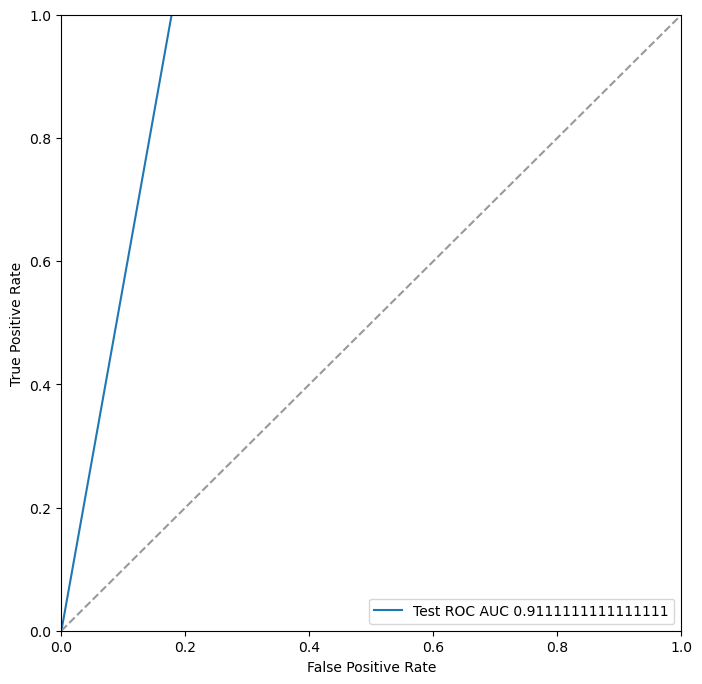

In [235]:
roc_auc_pic(y_predict, y_test)

In [236]:
from sklearn.model_selection import GridSearchCV

knn_2 = KNeighborsClassifier()
params = {'n_neighbors': range(1, 17), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn_2, params, scoring="roc_auc", cv=7)
grid_knn.fit(X_train_norm, y_train)

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 17),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [237]:
grid_knn.best_score_

0.9616780045351475

In [238]:
grid_knn.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [239]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_norm, y_train)

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier()

In [240]:
y_predict = tree.predict(X_test_norm)
print(roc_auc_score(y_test, y_predict))

0.9333333333333332


In [241]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        45
         1.0       0.98      0.89      0.93        45

    accuracy                           0.93        90
   macro avg       0.94      0.93      0.93        90
weighted avg       0.94      0.93      0.93        90



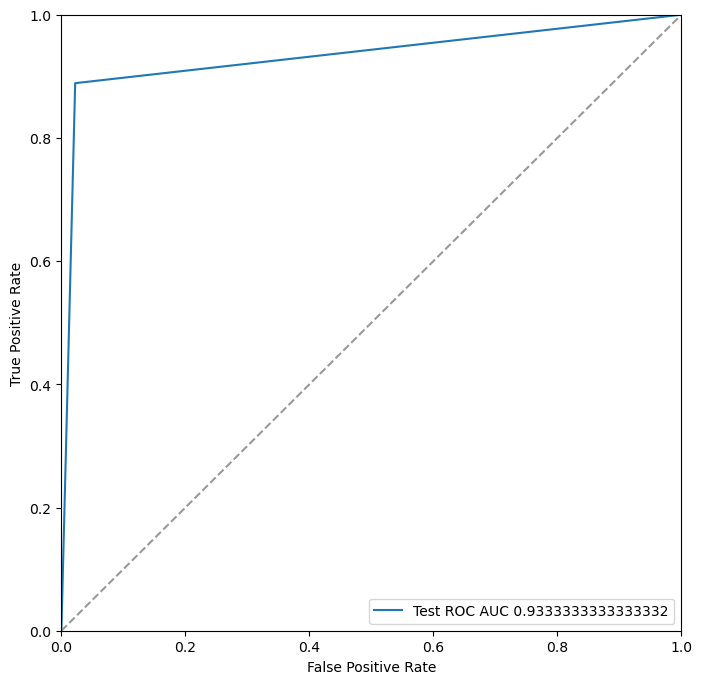

In [242]:
roc_auc_pic(y_predict, y_test)

In [243]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 8)
classifier.fit(X_train, y_train)

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

RandomForestClassifier(n_estimators=8)

In [244]:
from sklearn.metrics import classification_report

In [245]:
rfc_pred = classifier.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.91      0.80        45
         1.0       0.88      0.64      0.74        45

    accuracy                           0.78        90
   macro avg       0.80      0.78      0.77        90
weighted avg       0.80      0.78      0.77        90



/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [246]:
print(roc_auc_score(y_test, rfc_pred))

0.7777777777777778


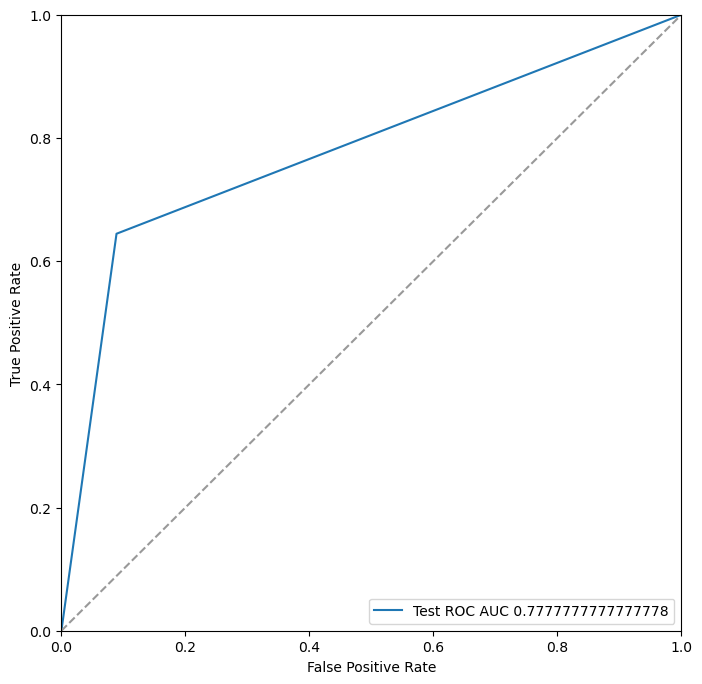

In [247]:
roc_auc_pic(rfc_pred, y_test)